In [2]:
import re
import pandas as pd

def date_time(s):
        pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
        result = re.match(pattern, s)
        if result:
            return True
        else:
            pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
            result = re.match(pattern, s)
            if result:
                return True
            else:
                return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    splitmessage = message.split(": ")
    if splitmessage[1:]:
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author = 'group_notification'
        message = splitmessage[0]
    return date, time, author, message

data = []
conversation = 'WhatsApp Chat with Civil War💪💪.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, user = None, None, None
    while True:
        line = fp.readline()
        if not line:
               break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, user, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, user, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

df = pd.DataFrame(data, columns=["date", 'time', 'user', 'message'])

In [3]:
#f = open('WhatsApp Chat with Civil War💪💪.txt','r',encoding='utf-8')

import datetime as dt
df.head()

,date,time,user,message
0,14/12/2021,1:47 am,group_notification,"Hritvik M3 created group ""Jawahar bois"""
1,14/12/2021,1:47 am,group_notification,Hritvik M3 added you
2,14/12/2021,1:47 am,group_notification,You're now an admin
3,14/12/2021,2:11 am,Karan Dua M3,<Media omitted>
4,14/12/2021,2:11 am,Karan Dua M3,<Media omitted>


In [4]:
df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y')
#df['date'] = df['date'].dt.strftime('%m-%d-%Y')

In [5]:
df.head()
df['Year'] = df.date.dt.year

In [6]:
df['Month_num'] = df['date'].dt.month

In [7]:
df['Month'] = df['date'].dt.month_name()

In [8]:
df['Day'] = df.date.dt.day

In [9]:
df['only_date'] = df['date'].dt.date

In [10]:
df['day_name'] = df['date'].dt.day_name()

In [11]:
#df.Time = df['time'].apply(lambda x: df.time(x, '%H:%M: %p').strftime('%I:%M:%S'))
df['Time'] = pd.to_datetime(df.time, format='%I:%M %p')
#df['Time'] = pd.to_datetime(time).strftime('%H:%M:%S'
df['Hours'] = df.Time.dt.hour

In [12]:
df['Minute']  =df.Time.dt.minute

In [13]:
df.head(2)

,date,time,user,message,Year,Month_num,Month,Day,only_date,day_name,Time,Hours,Minute
0,2021-12-14,1:47 am,group_notification,"Hritvik M3 created group ""Jawahar bois""",2021,12,December,14,2021-12-14,Tuesday,1900-01-01 01:47:00,1,47
1,2021-12-14,1:47 am,group_notification,Hritvik M3 added you,2021,12,December,14,2021-12-14,Tuesday,1900-01-01 01:47:00,1,47


In [14]:
feature = df[['user','message','Year','Month','Day','Hours','Minute','Month_num','only_date','day_name']]

In [15]:
feature.head(5)

,user,message,Year,Month,Day,Hours,Minute,Month_num,only_date,day_name
0,group_notification,"Hritvik M3 created group ""Jawahar bois""",2021,December,14,1,47,12,2021-12-14,Tuesday
1,group_notification,Hritvik M3 added you,2021,December,14,1,47,12,2021-12-14,Tuesday
2,group_notification,You're now an admin,2021,December,14,1,47,12,2021-12-14,Tuesday
3,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday
4,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday


In [16]:
words = []
for message in feature['message']:
    words.extend(message.split())

In [17]:
num_media_msg = feature[feature['message'] == '<Media omitted>'].shape[0]

In [18]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dheeraj chouhan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [19]:
from urlextract import URLExtract

In [20]:
extractor = URLExtract()

In [21]:
links = []
for message in feature['message']:
    links.extend(extractor.find_urls(message))

In [22]:
x = feature.user.value_counts().head()

In [23]:
import matplotlib.pyplot as plt

In [24]:
names = x.index
count = x.values

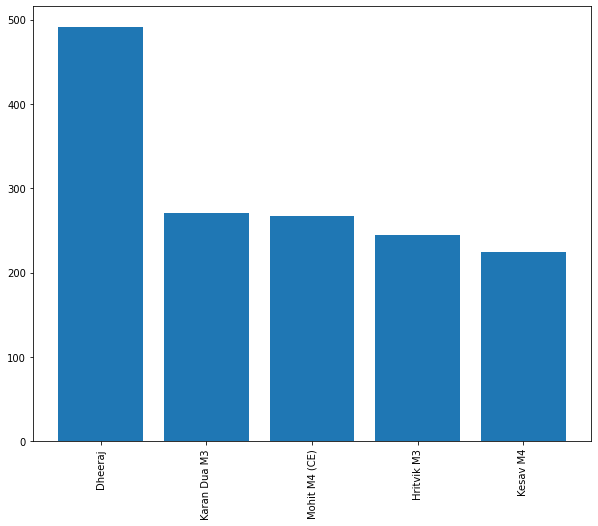

In [25]:
plt.figure(figsize = (10,8))
plt.bar(names,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [26]:
round((feature.user.value_counts()/feature.shape[0])*100,2).reset_index().rename(columns ={'index':'Name','user':'Percent'})

,Name,Percent
0,Dheeraj,22.59
1,Karan Dua M3,12.47
2,Mohit M4 (CE),12.28
3,Hritvik M3,11.27
4,Kesav M4,10.30
5,Avnesh Iitr,8.33
6,Karan M3,6.76
7,Myank M4,5.06
8,Jasmin M3,4.09
9,Hardik Aseri Jio,4.09


In [27]:
feature.head()

,user,message,Year,Month,Day,Hours,Minute,Month_num,only_date,day_name
0,group_notification,"Hritvik M3 created group ""Jawahar bois""",2021,December,14,1,47,12,2021-12-14,Tuesday
1,group_notification,Hritvik M3 added you,2021,December,14,1,47,12,2021-12-14,Tuesday
2,group_notification,You're now an admin,2021,December,14,1,47,12,2021-12-14,Tuesday
3,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday
4,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday


In [28]:
temp  = feature[feature['user'] != 'group_notification' ]

In [29]:
new_temp = temp[temp['message'] != '<Media omitted>']

In [30]:
f = open('hinglish.txt','r')
stop_words = f.read()
stop_word = stop_words.split('\n')

In [31]:
words = []
for message in new_temp['message']:
    for word in message.lower().split():
        if word not in stop_word:
            words.append(word)
    #words.extend(message.split())

In [32]:
words

['@917023261804',
 'roof',
 'click',
 'pic',
 'share',
 'dena',
 'dua',
 'bhej',
 'photo',
 'saale',
 '@919461517537',
 'message',
 'deleted',
 'jasmin',
 'photo',
 'bhej',
 'dena',
 'avneesh',
 'reh',
 'gya',
 'special',
 'lagata',
 'ruk',
 'message',
 'deleted',
 'beth',
 'yaaro',
 'train',
 'bdiya',
 'gand',
 'mara',
 'hame',
 'bta',
 'bhaiyo',
 '2-3',
 'dino',
 'bahar',
 'jana',
 'band',
 'high',
 'probability',
 '😂',
 'dheeraj',
 'fass',
 'hass',
 'ku',
 'lodu',
 'single',
 'rahega',
 'isliye',
 '😂',
 'ku',
 'meena',
 'dheeraj',
 'jagah',
 'soyega',
 'mna',
 'lodu',
 'sone',
 'reached',
 'wapas',
 'ander',
 'aane',
 'jugaad',
 'liyo',
 '*halwa',
 '@917023261804',
 '@919694454385',
 'message',
 'deleted',
 'message',
 'deleted',
 'message',
 'deleted',
 'etna',
 'ghatiya',
 'ah',
 'khakar',
 'chomu',
 'majak',
 'dekhna',
 'lag',
 '@919461517537',
 '😂😂😂😂😂',
 'bhej',
 'roorkee',
 'tereko',
 'entry',
 'dilwayenge',
 '🫂',
 'aa',
 'jaunga',
 '🤘',
 'keshav',
 'kaushik',
 'm4',
 '👊🏻',
 '@

In [33]:
from collections import Counter

In [34]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,92
1,deleted,90
2,class,48
3,aa,38
4,😂,35
5,dena,32
6,++,30
7,@917023261804,27
8,tou,27
9,link,26


In [35]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dheeraj chouhan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [36]:
import emoji

In [37]:
emojis = []
for message in feature['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [38]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,97
1,🫂,56
2,🔥,43
3,❤,21
4,🎉,17
...,...,...
63,🍬,1
64,☹,1
65,🤑,1
66,😔,1


In [39]:
feature

,user,message,Year,Month,Day,Hours,Minute,Month_num,only_date,day_name
0,group_notification,"Hritvik M3 created group ""Jawahar bois""",2021,December,14,1,47,12,2021-12-14,Tuesday
1,group_notification,Hritvik M3 added you,2021,December,14,1,47,12,2021-12-14,Tuesday
2,group_notification,You're now an admin,2021,December,14,1,47,12,2021-12-14,Tuesday
3,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday
4,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday
...,...,...,...,...,...,...,...,...,...,...
2169,Dheeraj,Hame polibazi nahi karni,2022,June,3,11,39,6,2022-06-03,Friday
2170,Karan Dua M3,M bhi nhi karna chata par phone aaya tha,2022,June,3,11,39,6,2022-06-03,Friday
2171,Dheeraj,Tou tu kar,2022,June,3,11,39,6,2022-06-03,Friday
2172,Dheeraj,@917023261804 5k me se 3k ki hame chapo de diyo,2022,June,3,16,56,6,2022-06-03,Friday


In [40]:
Timeline = feature.groupby(['Year','Month_num','Month']).count()['message'].reset_index()

In [41]:
time = []

In [42]:
for i in range(Timeline.shape[0]):
    time.append(Timeline['Month'][i]+ '-' + str(Timeline['Year'][i]))

In [43]:
Timeline['Time'] = time

In [44]:
Timeline

,Year,Month_num,Month,message,Time
0,2021,12,December,295,December-2021
1,2022,1,January,496,January-2022
2,2022,2,February,478,February-2022
3,2022,3,March,335,March-2022
4,2022,4,April,169,April-2022
5,2022,5,May,360,May-2022
6,2022,6,June,41,June-2022


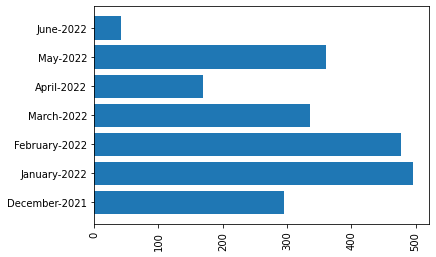

In [45]:
plt.barh(Timeline['Time'],Timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
daily_timeline = feature.groupby('only_date').count()['message'].reset_index()

In [47]:
daily_timeline

,only_date,message
0,2021-12-14,29
1,2021-12-15,14
2,2021-12-16,1
3,2021-12-17,2
4,2021-12-19,2
...,...,...
136,2022-05-29,2
137,2022-05-30,16
138,2022-06-01,6
139,2022-06-02,25


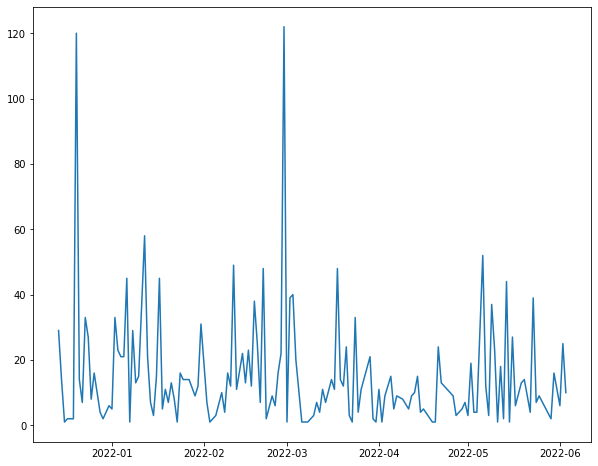

In [48]:
plt.figure(figsize = (10,8))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.show()

In [49]:
feature['day_name'].value_counts()

Monday       636
Thursday     347
Friday       339
Wednesday    256
Saturday     223
Tuesday      206
Sunday       167
Name: day_name, dtype: int64

In [50]:
feature

,user,message,Year,Month,Day,Hours,Minute,Month_num,only_date,day_name
0,group_notification,"Hritvik M3 created group ""Jawahar bois""",2021,December,14,1,47,12,2021-12-14,Tuesday
1,group_notification,Hritvik M3 added you,2021,December,14,1,47,12,2021-12-14,Tuesday
2,group_notification,You're now an admin,2021,December,14,1,47,12,2021-12-14,Tuesday
3,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday
4,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday
...,...,...,...,...,...,...,...,...,...,...
2169,Dheeraj,Hame polibazi nahi karni,2022,June,3,11,39,6,2022-06-03,Friday
2170,Karan Dua M3,M bhi nhi karna chata par phone aaya tha,2022,June,3,11,39,6,2022-06-03,Friday
2171,Dheeraj,Tou tu kar,2022,June,3,11,39,6,2022-06-03,Friday
2172,Dheeraj,@917023261804 5k me se 3k ki hame chapo de diyo,2022,June,3,16,56,6,2022-06-03,Friday


In [53]:
period = []
for hour in feature[['day_name','Hours']]['Hours']:
    if hour == 23:
        period.append(str(hour) + '-' + str('00'))
    elif hour == 0:
        period.append(str(hour) + '-' + str(hour +1))
    else:
        period.append(str(hour) + '-' + str(hour +1))


In [54]:
feature['Period']  = period

C:\Users\DHEERA~1\AppData\Local\Temp/ipykernel_17344/1481854584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Period']  = period


In [55]:
feature.head()

,user,message,Year,Month,Day,Hours,Minute,Month_num,only_date,day_name,Period
0,group_notification,"Hritvik M3 created group ""Jawahar bois""",2021,December,14,1,47,12,2021-12-14,Tuesday,1-2
1,group_notification,Hritvik M3 added you,2021,December,14,1,47,12,2021-12-14,Tuesday,1-2
2,group_notification,You're now an admin,2021,December,14,1,47,12,2021-12-14,Tuesday,1-2
3,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday,2-3
4,Karan Dua M3,<Media omitted>,2021,December,14,2,11,12,2021-12-14,Tuesday,2-3


AttributeError: module 'matplotlib.pyplot' has no attribute 'ythick'

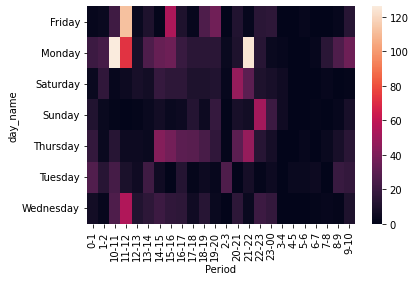

In [59]:
import seaborn as sns
sns.heatmap(feature.pivot_table(index = 'day_name',columns = 'Period', values = 'message',aggfunc='count').fillna(0))
plt.ythick(rotation = 'horizontal')
plt.show()